In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
y =data.target.values
x1=data.drop(["target"],axis=1)

In [ ]:
x0 =(1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [ ]:
def initializing_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
def forward_backwardpropogation(w,b,xtrain,y_train):
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    cost = (np.sum(loss))/xtrain.shape[1]
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivetive_bias": derivetive_bias}
    
    return cost,gradients

In [ ]:
def update(w,b,xtrain, ytrain, learning_rate, number_of_iteration):
    costlist = []
    costlist2 = []
    index = []
    for i in range(number_of_iteration):
        cost,gradients = forward_backwardpropogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivetive_bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
    parameters = {"weight": w, "bias":b}
    plt.plot(index,costlist2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costlist

In [ ]:
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    y_prediction = np.zeros((1,xtest.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    dimension = xtrain.shape[0] 
    w,b=initializing_weights_and_bias(dimension)
    parameters,gradients,costlist = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)
    print("Test Accuracy:{} %".format(100-np.mean(np.abs(y_prediciton_test-ytest))*100))

Cost after iteration 0: 0.694289
Cost after iteration 10: 0.521710
Cost after iteration 20: 0.461348
Cost after iteration 30: 0.431428
Cost after iteration 40: 0.413228


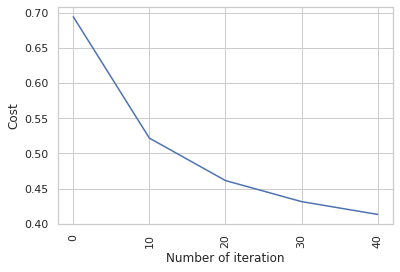

Test Accuracy:80.0 %


In [ ]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =50 )

Cost after iteration 0: 0.694289
Cost after iteration 10: 0.521710
Cost after iteration 20: 0.461348
Cost after iteration 30: 0.431428
Cost after iteration 40: 0.413228
Cost after iteration 50: 0.400787
Cost after iteration 60: 0.391656
Cost after iteration 70: 0.384629
Cost after iteration 80: 0.379037
Cost after iteration 90: 0.374472


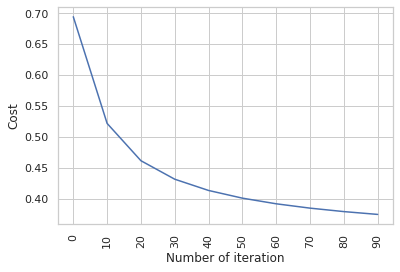

Test Accuracy:81.95121951219512 %


In [ ]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100 )

Cost after iteration 0: 0.694289
Cost after iteration 10: 0.521710
Cost after iteration 20: 0.461348
Cost after iteration 30: 0.431428
Cost after iteration 40: 0.413228
Cost after iteration 50: 0.400787
Cost after iteration 60: 0.391656
Cost after iteration 70: 0.384629
Cost after iteration 80: 0.379037
Cost after iteration 90: 0.374472


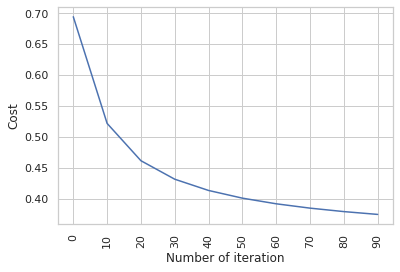

Test Accuracy:81.95121951219512 %


In [ ]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100)

Cost after iteration 0: 0.694289
Cost after iteration 10: 0.563004
Cost after iteration 20: 0.387820
Cost after iteration 30: 0.371660
Cost after iteration 40: 0.363062
Cost after iteration 50: 0.357291
Cost after iteration 60: 0.353120
Cost after iteration 70: 0.349944
Cost after iteration 80: 0.347433
Cost after iteration 90: 0.345390
Cost after iteration 100: 0.343692
Cost after iteration 110: 0.342256
Cost after iteration 120: 0.341025
Cost after iteration 130: 0.339958
Cost after iteration 140: 0.339025
Cost after iteration 150: 0.338203
Cost after iteration 160: 0.337474
Cost after iteration 170: 0.336825
Cost after iteration 180: 0.336243
Cost after iteration 190: 0.335719
Cost after iteration 200: 0.335247
Cost after iteration 210: 0.334819
Cost after iteration 220: 0.334431
Cost after iteration 230: 0.334077
Cost after iteration 240: 0.333754
Cost after iteration 250: 0.333459
Cost after iteration 260: 0.333188
Cost after iteration 270: 0.332939
Cost after iteration 280: 0.332

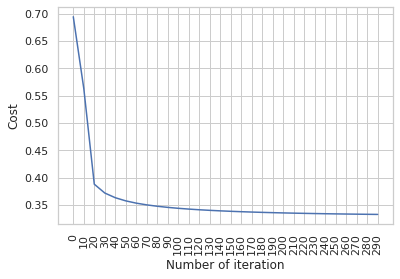

Test Accuracy:80.0 %


In [ ]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=3,number_of_iteration =300)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T))) 

Test Accuracy 0.8048780487804879


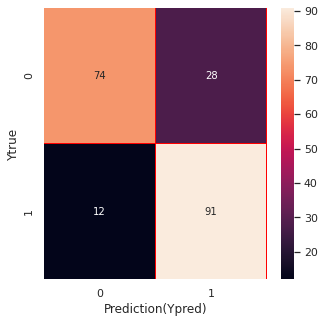

In [ ]:
yprediciton= LR.predict(xtest.T)
ytrue = ytest.T
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()